In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [2]:
all_df = pd.read_excel("data/PhishingData.xlsx")

In [3]:
cols=['Result','SFH','Widnow','SSLfinal' ,'Request', 'Anchor',
       'Traffic','Length','Domain','IP',]
all_df=all_df[cols]

In [4]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1353 train: 1072 test: 281


In [5]:
trainray= train_df.values
train_Features = trainray[:,1:]
train_Label = trainray[:,0]
    
testray= test_df.values
test_Features = testray[:,1:]
test_Label = testray[:,0]

In [6]:
train_Features[:4]

array([[ 1, -1,  1, -1, -1,  1,  1,  1,  0],
       [-1, -1, -1, -1, -1,  0,  1,  1,  1],
       [ 1, -1,  0,  0, -1,  0, -1,  1,  0],
       [ 1,  0,  1, -1, -1,  0,  1,  1,  0]])

In [7]:
train_Label[:4]

array([0, 1, 1, 0])

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=40, input_dim=9, 
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=20, 
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                400       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 2,471
Trainable params: 2,471
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [17]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=35,verbose=2)

Train on 964 samples, validate on 108 samples
Epoch 1/30
 - 1s - loss: 0.6831 - acc: 0.0757 - val_loss: 0.6691 - val_acc: 0.0926
Epoch 2/30
 - 0s - loss: 0.6365 - acc: 0.0757 - val_loss: 0.5593 - val_acc: 0.0926
Epoch 3/30
 - 0s - loss: 0.2727 - acc: 0.0757 - val_loss: -2.9775e-01 - val_acc: 0.0926
Epoch 4/30
 - 0s - loss: -1.7332e+00 - acc: 0.0757 - val_loss: -4.0932e+00 - val_acc: 0.0926
Epoch 5/30
 - 0s - loss: -5.4322e+00 - acc: 0.0757 - val_loss: -6.0280e+00 - val_acc: 0.0926
Epoch 6/30
 - 0s - loss: -6.1429e+00 - acc: 0.2386 - val_loss: -6.2734e+00 - val_acc: 0.3241
Epoch 7/30
 - 0s - loss: -6.3275e+00 - acc: 0.3620 - val_loss: -6.4095e+00 - val_acc: 0.3519
Epoch 8/30
 - 0s - loss: -6.4340e+00 - acc: 0.3683 - val_loss: -6.5467e+00 - val_acc: 0.3704
Epoch 9/30
 - 0s - loss: -6.5099e+00 - acc: 0.3724 - val_loss: -6.5826e+00 - val_acc: 0.3889
Epoch 10/30
 - 0s - loss: -6.5451e+00 - acc: 0.3766 - val_loss: -6.6538e+00 - val_acc: 0.3981
Epoch 11/30
 - 0s - loss: -6.6088e+00 - acc: 0.3

In [18]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

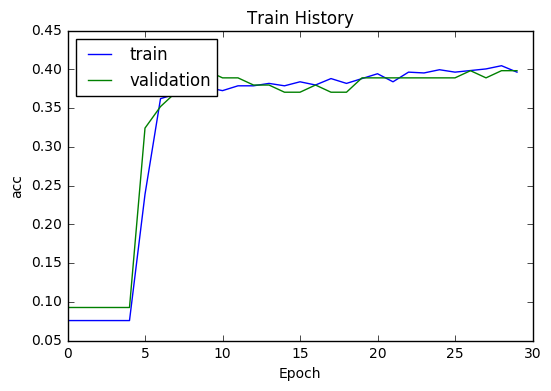

In [19]:
show_train_history(train_history,'acc','val_acc')

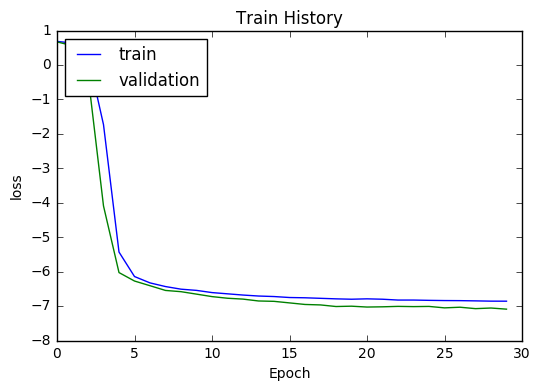

In [20]:
show_train_history(train_history,'loss','val_loss')

In [21]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

281/281 [==============================] - 0s 139us/step


In [22]:
scores[1]

0.34519572964342465